<a href="https://colab.research.google.com/github/SOBIKA-G/Data-science-assignment/blob/main/Sobika_G_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DB Index: 1.354080785856213
Silhouette Score: 0.2107247275632971


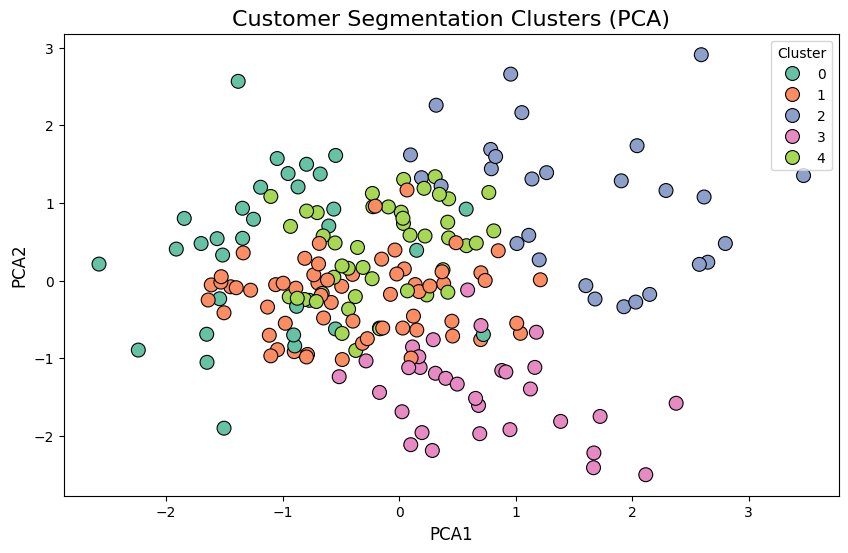

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('/content/drive/MyDrive/Customers.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Transactions (1).csv')

# Clean the column names
transactions.columns = transactions.columns.str.strip()  # Strip extra spaces
transactions.rename(columns={'Category_x': 'Category', 'Category_y': 'DuplicateCategory'}, inplace=True)

# Merge product data with transaction data to get product category information
transactions = pd.merge(transactions, products[['ProductID', 'Category']], on='ProductID', how='left')

# Aggregate transaction data by CustomerID and Category
customer_transaction = transactions.groupby(['CustomerID', 'Category'])['TotalValue'].sum().unstack(fill_value=0)

# Create customer demographic features (Region, SignupDays)
customer_demo = customers[['CustomerID', 'Region']].copy()
customer_demo['SignupDays'] = (pd.to_datetime('today') - pd.to_datetime(customers['SignupDate'])).dt.days

# Merge customer demographic data with transaction data
customer_data = pd.merge(customer_demo, customer_transaction, on='CustomerID', how='left')

# Handle missing values
customer_data = customer_data.fillna(0)

# Normalize the data
scaler = StandardScaler()
transaction_columns = customer_transaction.columns
customer_data[transaction_columns] = scaler.fit_transform(customer_data[transaction_columns])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data[transaction_columns])

# Evaluate the clustering performance

# Davies-Bouldin Index (lower is better)
db_index = davies_bouldin_score(customer_data[transaction_columns], customer_data['Cluster'])
print(f"DB Index: {db_index}")

# Silhouette Score (higher is better)
silhouette_avg = silhouette_score(customer_data[transaction_columns], customer_data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Visualize the clusters using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(customer_data[transaction_columns])
customer_data['PCA1'] = principal_components[:, 0]
customer_data['PCA2'] = principal_components[:, 1]

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_data, palette='Set2', s=100, edgecolor='black')
plt.title('Customer Segmentation Clusters (PCA)', fontsize=16)
plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)
plt.legend(title='Cluster')
plt.show()
